# Multiple Linear Regression

## Importing the necessary Libraries and Packages

In [10]:
from sklearn.model_selection import train_test_split # splitting the dataset
from sklearn.linear_model import LinearRegression # regression algorithm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error # accuracy metric
import numpy as np # data processing
import pandas as pd # data processing 
import matplotlib.pyplot as plt # data plotting

## Importing the csv file as a DataFrame

In [11]:
df = pd.read_csv("Dataset/Startups.csv")
df.head()

,Research,Marketing,Profit
0,165349.20,401784.10,192261.83
1,162597.70,373898.53,191792.06
2,153441.51,357934.54,191050.39
3,144372.41,323199.62,182901.99
4,142107.34,300168.42,166187.94


## Now taking 2 parts from the dataset:
### X : which contains all the data except the <b>Profit</b> column<br>y : which contains only the <b>Profit</b> column 

In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Visualisation of the Data

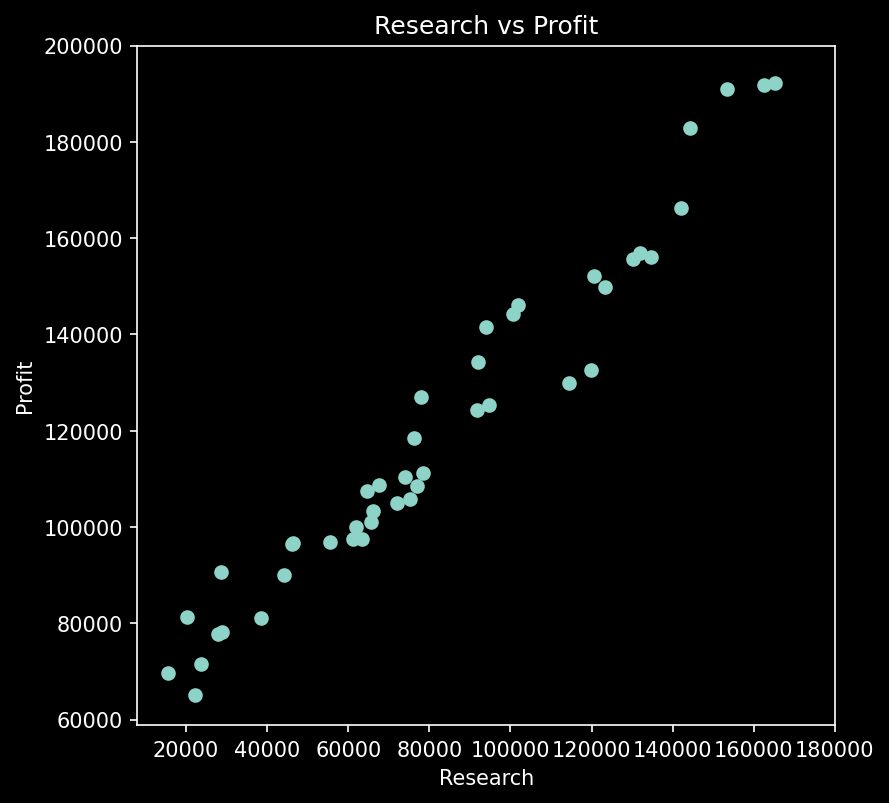

In [13]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
Research = df["Research"]
Profit = df["Profit"]
plt.scatter(Research, Profit)
plt.xticks(np.arange(20000, 200000, 20000))
plt.yticks(np.arange(60000,220000,20000))
plt.title("Research vs Profit")
plt.xlabel("Research")
plt.ylabel("Profit")
plt.savefig("Images/Research_vs_Profit.png",bbox_inches='tight')

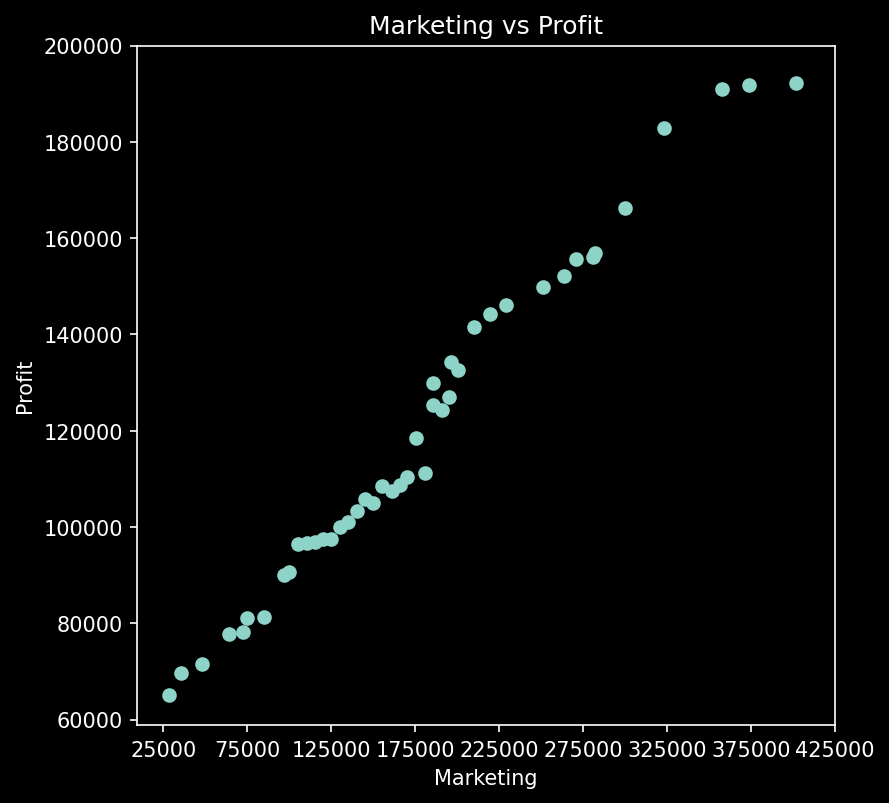

In [14]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
Marketing = df["Marketing"]
Profit = df["Profit"]
plt.scatter(Marketing, Profit)
plt.xticks(np.arange(25000, 475000, 50000))
plt.yticks(np.arange(60000,220000,20000))
plt.title("Marketing vs Profit")
plt.xlabel("Marketing")
plt.ylabel("Profit")
plt.savefig("Images/Marketing_vs_Profit.png",bbox_inches='tight')

## Split the X and y dataframes for test and training

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

## Implementation of the Model

In [16]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

## Performance of the Model

In [17]:
# Printing the coefficient of determination of the regression
print("The coefficient of determination :", r2_score(y_test,y_pred))

The coefficient of determination : 0.9806397350397471


## Additional Performance Metrics

In [18]:
print('Mean Absolute Error (MAE) :', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE) :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE) :', mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE) :', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error (MAE) : 3940.528738121537
Mean Squared Error (MSE) : 23120919.49796699
Root Mean Squared Error (RMSE) : 4808.421726301364
Mean Absolute Percentage Error (MAPE) : 0.03445709379204582
